# Analytical code for the RF model

This code is taken from https://arxiv.org/pdf/2002.09339.pdf.
Many thanks to Federica Gerace and Bruno Loureiro for sharing.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import torch
cmap = plt.get_cmap('viridis')

plt.rcParams.update(plt.rcParamsDefault)
font = {'family' : 'serif', 'size':12}
plt.rc('font', **font)
plt.rc("lines", linewidth=3.0)
plt.rcParams["savefig.dpi"] = 500
cmap = plt.get_cmap('Spectral_r')

savedir = './figs/rf-analytic/'
datadir = './data/'

import warnings
warnings.filterwarnings('ignore')

# Phase space (fig 3)

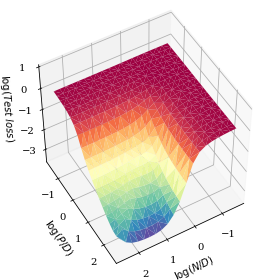

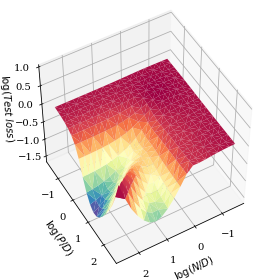

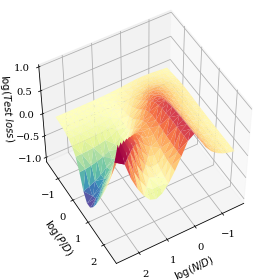

In [23]:
%matplotlib inline

data = torch.load(datadir+'phase_space.pyT')
data = pd.DataFrame.from_dict(data)

lamb=1e-1
F = 'gaussian'
log=True
nl = 'tanh'

for task in ['regression']:
    data1 = data
    data1 = data1[data1['lamb']==lamb]
    data1 = data1[data1['F']==F]
    data1 = data1[data1['task']==task]
    data1 = data1[data1['nonlinearity']==nl]
    
    #fig = plt.figure(figsize=(len(deltas)*8,8))
    deltas = sorted(list(set(data1['delta'])))#[:-2]

    observable='test_loss'

    for i, delta in enumerate(deltas):
        #ax = fig.add_subplot(1,len(deltas),i+1,projection='3d')
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(1,1,1,projection='3d')
        data_tmp = data1[data1['delta']==delta]
        x = np.log10(data_tmp['Psi2'])
        y = np.log10(data_tmp['Psi1'])
        z = data_tmp[observable]
        if log: z = np.log10(z)
        ax.plot_trisurf(x, y, z, cmap=cmap)
        ax.view_init(50, 60)
        ax.set_xlabel(r'$\log(N/D)$',     fontsize=10)
        ax.set_ylabel(r'$\log(P/D)$',     fontsize=10)
        ax.set_zlabel(r'$\log(Test~loss)$',   fontsize=10)
        ax.set_zlim(top=1)
        ax.set_zlim(top=1)
        plt.tight_layout()
        plt.savefig(savedir+'triple_descent_%s_noise%.1f.pdf'%(task,delta))

    #fig.suptitle(task+' $\lambda = 10^{%d}$'%np.log10(lamb), fontsize=20)
    #plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #plt.savefig(savedir+'triple_descent_%s.pdf'%task)
    plt.show()

# Sample-wise

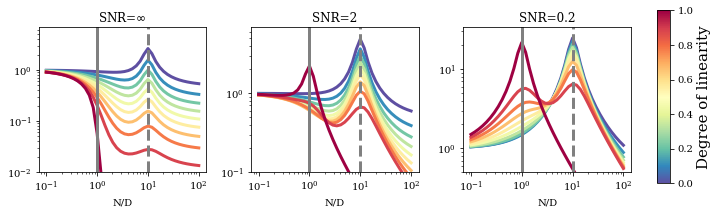

In [24]:
data = torch.load(datadir+'sample-wise.pyT')

deltas = sorted(list(set(data['delta'])))
nls = sorted(list(set(data['nonlinearity'])))

fig, axarr = plt.subplots(1,len(deltas), figsize=(3*len(deltas),3))

observable = 'test_loss'

for i, delta in enumerate(deltas):

    for j, nl in enumerate(nls[1:]):
        data_tmp = data[data['delta']==delta]
        data_tmp = data_tmp[data['nonlinearity']==nl]
        data_tmp.plot(ax=axarr[i], x='Psi2', y=observable, style='-', color=cmap(j/(len(nls)-2)), legend=False)# label=r'r={0:.1f}'.format(nl))
        sm = plt.cm.ScalarMappable(cmap=cmap)

    axarr[i].set_xscale('log')
    axarr[i].set_yscale('log')
    axarr[i].set_xlabel('N/D')
    axarr[i].axvline(x=1, color='grey', label='N=D')
    axarr[i].axvline(x=10, color='grey', ls='--', label='N=P')
axarr[0].set_ylim(bottom=1e-2)  
axarr[1].set_ylim(bottom=1e-1)  
axarr[2].set_ylim(bottom=0.5)  
axarr[0].set_title(r'SNR=$\infty$')
axarr[1].set_title(r'SNR=2')
axarr[2].set_title(r'SNR=0.2')

#axarr[0].legend()
    
cax = fig.add_axes([1.02, 0.15, .02, .8])    
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.set_ylabel(r'Degree of linearity', fontsize=15)
fig.tight_layout()
plt.savefig(savedir+'sample-wise_{}.pdf'.format(observable), bbox_inches='tight')

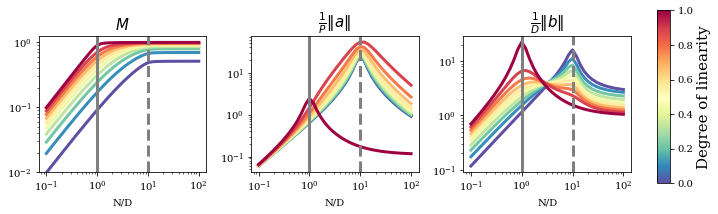

In [25]:
data = torch.load(datadir+'sample-wise.pyT')

deltas = sorted(list(set(data['delta'])))
nls = sorted(list(set(data['nonlinearity'])))

fig, axarr = plt.subplots(1,len(deltas), figsize=(3*len(deltas),3))

#for i, delta in enumerate(deltas):
delta = deltas[-1]
for i,observable in enumerate(['M','qw','qx']):
    for j, nl in enumerate(nls[1:]):
        data_tmp = data[data['delta']==delta]
        data_tmp = data_tmp[data['nonlinearity']==nl]
        data_tmp.plot(ax=axarr[i], x='Psi2', y=observable, style='-', color=cmap(j/(len(nls)-2)), legend=False)# label=r'r={0:.1f}'.format(nl))
        sm = plt.cm.ScalarMappable(cmap=cmap)

    axarr[i].set_xscale('log')
    axarr[i].set_yscale('log')
    axarr[i].set_xlabel('N/D')
    axarr[i].axvline(x=1, color='grey', label='N=D')
    axarr[i].axvline(x=10, color='grey', ls='--', label='N=P')
axarr[0].set_ylim(bottom=1e-2)  
axarr[0].set_title(r'$M$'             ,fontsize=15)
axarr[1].set_title(r'$\frac{1}{P}\Vert a\Vert$'  ,fontsize=15)
axarr[2].set_title(r'$\frac{1}{D}\Vert b\Vert$',fontsize=15)

#axarr[0].legend()
    
cax = fig.add_axes([1.02, 0.15, .02, .8])    
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.set_ylabel(r'Degree of linearity', fontsize=15)
fig.tight_layout()
plt.savefig(savedir+'sample-wise_observables.pdf', bbox_inches='tight')

# Parameter-wise

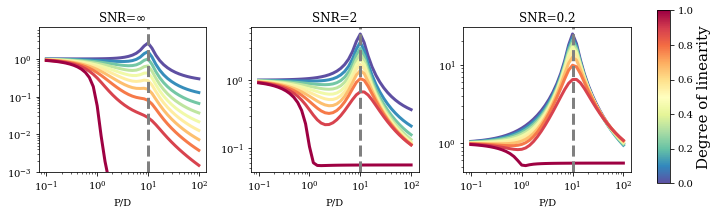

In [26]:
data = torch.load(datadir+'parameter-wise.pyT')

deltas = sorted(list(set(data['delta'])))
nls = sorted(list(set(data['nonlinearity'])))
Psi2 = sorted(list(set(data['Psi2'])))[0]

fig, axarr = plt.subplots(1,len(deltas), figsize=(3*len(deltas),3))


observable = 'test_loss'

for i, delta in enumerate(deltas):

    for j, nl in enumerate(nls[1:]):
        data_tmp = data[data['delta']==delta]
        data_tmp = data_tmp[data['nonlinearity']==nl]
        data_tmp.plot(ax=axarr[i], x='Psi1', y=observable, style='-', color=cmap(j/(len(nls)-2)), legend=False)# label=r'r={0:.1f}'.format(nl))
        sm = plt.cm.ScalarMappable(cmap=cmap)

    axarr[i].set_xscale('log')
    axarr[i].set_yscale('log')
    axarr[i].set_xlabel('P/D')
    axarr[i].axvline(x=Psi2, color='grey', ls='--', label='nonlinear peak')
axarr[0].set_ylim(1e-3)
axarr[0].set_title(r'SNR=$\infty$')
axarr[1].set_title(r'SNR=2')
axarr[2].set_title(r'SNR=0.2')
    
cax = fig.add_axes([1.02, 0.15, .02, .8])    
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.set_ylabel(r'Degree of linearity', fontsize=15)
fig.tight_layout()
plt.savefig(savedir+'parameter-wise_{}.pdf'.format(observable), bbox_inches='tight')

# Generate the data

In [21]:
# Non-linearities and their respective coefficients
NL = {'relu', 'sign', 'tanh', 'erf'}
COEFFICIENTS = {'relu': (1/np.sqrt(2*np.pi), 0.5, np.sqrt((np.pi-2)/(4*np.pi))), 
               'erf': (0, 2/np.sqrt(3*np.pi), 0.200364), 'tanh': (0, 0.605706, 0.165576),
               'sign': (0, np.sqrt(2/np.pi), np.sqrt(1-2/np.pi)), 'linear':(0,1,0),'abs':(np.sqrt(2/np.pi),0,np.sqrt(1-2/np.pi))}
def get_coef(nl):
    if type(nl)==str:
        return COEFFICIENTS[nl]
    else:
        return (0, nl**0.5, (1-nl)**0.5)
    
def activation(x, nonlinearity):
    if nonlinearity == 'sign':
        return np.sign(x)
    elif nonlinearity == 'relu':
        return np.maximum(x, 0)
    elif nonlinearity =='erf':
        return erf(x)
    elif nonlinearity == 'tanh':
        return np.tanh(x)
    else:
        print('nonlinearity not known')

In [4]:
# Stieltjes transform and its derivative for gaussian and orthogonal features.
def stieltjes_g(z, gamma, F='gaussian'):
    g, dg = 0, 0
    z = gamma * z 
    if F=='gaussian':
        det = np.sqrt((z-gamma-1)**2 - 4*gamma)
        g = (1-z-gamma-det)/(2*z*gamma)
        dg = -1/(2*z*gamma) * (1 + (z-gamma-1)/det + (1-z-gamma-det)/z) 
    elif F == 'orthogonal':        
        if gamma > 1:
            g = -(1-1/gamma)/z +1/gamma *  1/(gamma-z)
            dg = (1-1/gamma)/z**2 + 1/gamma *  1/(gamma-z)**2
        else:
            g = 1/(1-z)
            dg = 1/(1-z)**2
        
    return gamma*g, gamma**2 *dg

In [5]:
# One step update of saddle-point equations
def update_classification(Vx, qx, mx, Vw, qw, alpha, gamma, lamb, delta, nl='erf',  F='gaussian'):
    mu0, mu1, mustar = get_coef(nl)
    
    Q = mu1**2 * qx + mustar**2 * qw
    M = mu1 * mx
    V = mu1**2 * Vx + mustar**2 * Vw
    
    Vstar = 1 - M**2/Q
    c1 = 1/(1+V)
    #noise_factor = 1-2*delta
    noise_factor1 = 1-delta + delta/(1-2*M**2/Q)**0.5
    noise_factor2 = 1-delta - delta/(1-2*M**2/Q)**0.5

    mxhat = (alpha/gamma) * mu1 * c1 * np.sqrt(2/np.pi) * noise_factor2
    Vxhat = (alpha/gamma)*(mu1**2) * c1
    qxhat = (alpha/gamma) * mu1**2 * c1**2 * (1 + Q - 2*noise_factor1*M * np.sqrt(2/np.pi))
    
    c2 = 1/(1 + Vxhat * Vw)

    Vwhat = (alpha/gamma) * mustar**2 * c1
    qwhat = (alpha/gamma) * mustar**2 * c1**2 * (1 + Q - 2*noise_factor1*M * np.sqrt(2/np.pi))
    
    z = (lamb+Vwhat)/Vxhat
    g, dg = stieltjes_g(-z, gamma, F=F)
    
    Vxnew =  1/Vxhat * (1 - z * g)
    qxnew =  ((mxhat**2 + qxhat)/Vxhat**2 * (1-2*z*g + z**2 * dg)-
                 qwhat/((lamb+Vwhat)*Vxhat)*(-z*g + z**2 * dg))
    mxnew =  mxhat * Vxnew 
        
    Vwnew = 1/(Vwhat+lamb)*(1/gamma - 1 + z*g)
    qwnew = (qwhat/(lamb+Vwhat)**2 * (1/gamma-1 + z**2 * dg) - 
             (mxhat**2 + qxhat)/(Vxhat*(lamb+Vwhat)) * (-z*g+ z**2 * dg))

    return Vxnew, qxnew, mxnew, Vwnew, qwnew

# One step update of saddle-point equations
def update_regression(Vx, qx, mx, Vw, qw, alpha, gamma, lamb, delta, nl='erf',  F='gaussian'):
    mu0, mu1, mustar = get_coef(nl)
    
    Q = mu1**2 * qx + mustar**2 * qw
    M = mu1 * mx
    V = mu1**2 * Vx + mustar**2 * Vw
    
    Vstar = 1 - M**2/Q
    c1 = 1/(1+V)

    mxhat = (alpha/gamma) * mu1 * c1 
    Vxhat = (alpha/gamma)*(mu1**2) * c1
    qxhat = (alpha/gamma) * mu1**2 * c1**2 * (1 + Q + delta - 2*M)
    
    c2 = 1/(1 + Vxhat * Vw)

    Vwhat = (alpha/gamma) * mustar**2 * c1
    qwhat = (alpha/gamma) * mustar**2 * c1**2 * (1 + Q + delta - 2*M)
    
    z = (lamb+Vwhat)/Vxhat
    g, dg = stieltjes_g(-z, gamma, F=F)
    
    Vxnew =  1/Vxhat * (1 - z * g)
    qxnew =  ((mxhat**2 + qxhat)/Vxhat**2 * (1-2*z*g + z**2 * dg)-
                 qwhat/((lamb+Vwhat)*Vxhat)*(-z*g + z**2 * dg))
    mxnew =  mxhat * Vxnew 
        
    Vwnew = 1/(Vwhat+lamb)*(1/gamma - 1 + z*g)
    qwnew = (qwhat/(lamb+Vwhat)**2 * (1/gamma-1 + z**2 * dg) - 
             (mxhat**2 + qxhat)/(Vxhat*(lamb+Vwhat)) * (-z*g+ z**2 * dg))

    return Vxnew, qxnew, mxnew, Vwnew, qwnew

In [6]:
# I
def damping(q_new, q_old, coef_damping=0.5):
    return (1 - coef_damping) * q_new + coef_damping * q_old

def iterate_se(alpha, gamma, lamb, delta=0, nl='erf', F='gaussian',
               max_iter=int(1e5), eps=1e-9, init_condition='uninformed', task='classification'):
    """ 
    Update state evolution equations. 
    
    Parameters:
    * eps = threshold to reach convergence.
    * max_iter = maximum number of steps if convergence not reached.
    """
    
    # Initialise qu and qv
    Vx = np.zeros(max_iter)
    qx = np.zeros(max_iter)
    mx = np.zeros(max_iter)

    Vw = np.zeros(max_iter)
    qw = np.zeros(max_iter)
    
    if init_condition == 'uninformed':
        Vx[0], qx[0], mx[0] = 0.001, 0.001, 0.001
        Vw[0], qw[0] = 0.001, 0.001
        
    elif init_condition == 'informed':
        Vx[0], qx[0], mx[0] = 0.999, 0.999, 0.999
        Vw[0], qw[0] = 0.999, 0.999
        
    for t in range(max_iter - 1):
        if task=='classification':
            Vxtmp, qxtmp, mxtmp, Vwtmp, qwtmp = update_classification(Vx[t], qx[t], mx[t], Vw[t], qw[t], 
                                                          alpha, gamma, lamb, delta, nl=nl, F=F)
        elif task=='regression':
            Vxtmp, qxtmp, mxtmp, Vwtmp, qwtmp = update_regression(Vx[t], qx[t], mx[t], Vw[t], qw[t], 
                                                          alpha, gamma, lamb, delta, nl=nl, F=F)            
        
        Vx[t + 1], qx[t + 1], mx[t+1] = damping(Vxtmp, Vx[t]), damping(qxtmp, qx[t]), damping(mxtmp, mx[t])
        Vw[t + 1], qw[t + 1] = damping(Vwtmp, Vw[t]), damping(qwtmp, qw[t])
                
        diff = np.abs(Vx[t + 1] - Vx[t]) + np.abs(qx[t + 1] - qx[t]) + np.abs(mx[t + 1] - mx[t])
        diff += np.abs(Vw[t + 1] - Vw[t]) + np.abs(qw[t + 1] - qw[t])

        if diff < eps or np.isnan(diff):
            break
    
    return Vx[t], qx[t], mx[t], Vw[t], qw[t], t

# Phase space

In [39]:
Psi1s = np.logspace(-1.5, 2.5, 20)
Psi2s = np.logspace(-1.5, 2.5, 20)
lambs = [1e-1, 1e-3]
nls = ['relu','tanh']
deltas = [0,0.5,5]
Fs= ['gaussian']
tasks= ['regression']
data = {'task':[], 'nonlinearity': [], 'F': [], 'alpha': [], 'Psi1': [], 'Psi2': [], 'gamma':[], 'delta':[], 
        'Vx': [], 'qx': [], 'mx': [], 'Vw': [], 'qw': [], 'Q':[], 'M':[], 'test_error':[], 'test_loss':[], 'train_loss':[], 't': [], 'lamb': []}


for nonlinearity in nls:
    mu0, mu1, mustar = get_coef(nl)
    for counter,Psi1 in enumerate(Psi1s):
        print(counter, end=' ')
        for Psi2 in Psi2s:
            for task in tasks:
                for F in Fs:
                    for delta in deltas:
                        for lamb in lambs:
                            alpha = Psi2/Psi1
                            gamma = 1/Psi1

                            Vx, qx, mx, Vw, qw, t = iterate_se(alpha, gamma, lamb, delta=delta,nl=nonlinearity, 
                                                               F=F, init_condition='uninformed', task=task)

                            V = mu1**2 * Vx + mustar**2 * Vw
                            Q = mu1**2 * qx + mustar**2 * qw
                            M = mu1 * mx

                            test_error = (1/np.pi)* np.arccos(M/np.sqrt(Q))
                            test_loss = 1 + Q - 2*M
                            train_loss = -lamb/(2*alpha) * qw + 1/(4*(1+V)**2) * (1 + Q - 2*M + V**2 * delta)
                            
                            for k in data:
                                data[k].append(eval(k))

data = pd.DataFrame.from_dict(data)

012345678910111213141516171819012345678910111213141516171819

# Varying nonlinearity

In [ ]:
#Sample wise
#Psi1s = [10]
#Psi2s = np.logspace(-1, 2, 40)
#Parameter wise
Psi1s = np.logspace(-1, 2, 40)
Psi2s = [10]

lambs = [1e-3]
nls = np.linspace(0,1,11)
deltas = [0,0.5,5]
Fs= ['gaussian']
tasks= ['regression']
data = {'task':[], 'nonlinearity': [], 'F': [], 'alpha': [], 'Psi1': [], 'Psi2': [], 'gamma':[], 'delta':[], 
        'Vx': [], 'qx': [], 'mx': [], 'Vw': [], 'qw': [], 'Q':[], 'M':[], 'test_error':[], 'test_loss':[], 'train_loss':[], 't': [], 'lamb': []}

for nonlinearity in nls:
    print(nonlinearity)
    mu0, mu1, mustar = get_coef(nl)
    for Psi1 in Psi1s:
        for counter,Psi2 in enumerate(Psi2s):
            for task in tasks:
                for F in Fs:
                    for delta in deltas:
                        for lamb in lambs:
                            alpha = Psi2/Psi1
                            gamma = 1/Psi1

                            Vx, qx, mx, Vw, qw, t = iterate_se(alpha, gamma, lamb, delta=delta,nl=nonlinearity, 
                                                               F=F, init_condition='uninformed', task=task)

                            V = mu1**2 * Vx + mustar**2 * Vw
                            Q = mu1**2 * qx + mustar**2 * qw
                            M = mu1 * mx

                            test_error = (1/np.pi)* np.arccos(M/np.sqrt(Q))
                            test_loss = 1 + Q - 2*M
                            train_loss = -lamb/(2*alpha) * qw + 1/(4*(1+V)**2) * (1 + Q - 2*M + V**2 * delta)
                            
                            for k in data:
                                data[k].append(eval(k))



data = pd.DataFrame.from_dict(data)